---

title: The Federalist Papers | NLP Analysis (Part 1)
author: Justin Schulberg, Sabri Rafi
date: '2021-03-10'
slug: []
categories:
  - nlp
  - history
tags: 
  - python
comments: yes
image: 'images/fed_authors.jpeg'
share: yes

---

When Alexander Hamilton, John Jay, and James Madison came together in support of the ratification of the Constitution, they created what has become one of the most celebrated series of political texts in history. The Federalist Papers, a series of 85 essays, helped push New Yorkers towards ratification and laid some of the strongest arguments in favor of a strong Federal Government.

In part one of our analysis, we perform an Exploratory Data Analysis (EDA) using modern Natural Language Processing (NLP) techniques to to better understand these essays. We will showcase insightful visualizations that help us learn more about each individual author's writing style, word counts, and the frequency in which those words appear in the essays.

In future analyses, we will perform text summarization to allow readers to get a precursory understanding of the topics each essay discusses, cosine similarity to understand which essays are most related, and even try to build an interactive application that makes it easy to understand the essays.

Here is part one of our analysis.
 

In [1]:
# Load Data and import packages
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import os

### NLTK Download
# Note: To download nltk products, you need to run the nltk downloader. If you 
# just want to run this quickly, uncomment the following line and run:
# nltk.download('popular')

# Note that we need to go back one folder to the parent directory so that we can actually access the Data/ folder
parent_dir = os.path.realpath('..')
fed_papers = pd.read_csv(parent_dir + "/Data/full_fedpapers.csv").rename(columns = {'Lemmatized_Word': 'word'})

print(fed_papers.head())


                                               Lines     Essay        Word  \
0  addition defects already enumerated existing f...  Essay 22    addition   
1  addition defects already enumerated existing f...  Essay 22     defects   
2  addition defects already enumerated existing f...  Essay 22     already   
3  addition defects already enumerated existing f...  Essay 22  enumerated   
4  addition defects already enumerated existing f...  Essay 22    existing   

         word                                              Title    Author  \
0    addition  The Same Subject Continued: Other Defects of t...  Hamilton   
1      defect  The Same Subject Continued: Other Defects of t...  Hamilton   
2     already  The Same Subject Continued: Other Defects of t...  Hamilton   
3  enumerated  The Same Subject Continued: Other Defects of t...  Hamilton   
4    existing  The Same Subject Continued: Other Defects of t...  Hamilton   

       Publication        Date  
0  New York Packet  1787-12-1

First, we create a few data frames that can be used for analysis purposes later on. To generate these datasets, we have to get rid of some of the unnecessary words that don't signify very much to us (i.e. stop words). 

In [2]:
# ----------------------------------------------------------------------------
#                             Data Prep
# ----------------------------------------------------------------------------

stop_words = ['would', 'may', 'yet', 'must', 'shall', 'not', 'still', 'let', 
              'also', 'ought', 'a', 'the', 'it', 'i', 'upon', 'but', 'if', 'in',
              'this', 'might', 'and', 'us', 'can', 'as', 'to', 'make', 'made',
             'much']

fed_nonstop = fed_papers.copy()
fed_nonstop = fed_nonstop[~fed_nonstop['word'].isin(stop_words)]


# Start by creating a grouped dataframe of our word counts
word_counts = fed_nonstop.groupby(['word']) \
    .size() \
    .reset_index(name = 'count') \
    .sort_values('count', ascending = False) \
    .reset_index(drop = True)


Now that our data has been cleaned up and organized a bit, let's take a look at the top 20 words that appear in The Federalist Papers.

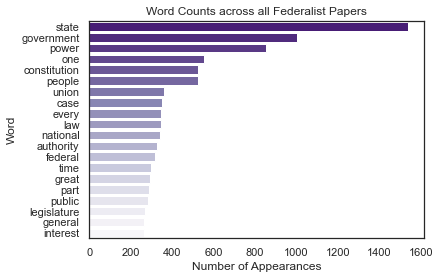

In [3]:
# ----------------------------------------------------------------------------
#                             Viz 1: Top 20 Words
# ----------------------------------------------------------------------------
#%% Our first visualization counts the top 20 words across all documents.
# Set the theme
sns.set_style('white')
sns.set_context('notebook')

# Build the visualization
viz1 = sns.barplot(x = 'count',
            y = 'word',
            data = word_counts[:20],
            palette = "Purples_r")

# Set our labels
viz1.set(xlabel='Number of Appearances', ylabel='Word', title = 'Word Counts across all Federalist Papers')
plt.show()

Unsurprisingly, the word *state/states* and *government* appear more than almost any others. At the time, Hamilton, Madison, and Jay were arguing for the dissolution of The Articles of Confederation, the governing document for early America, which ceded immense power to the states. Most of the purpose of the Constitution was to shift power from the states to the Federal Government.

Next, we will look at the lengths of each document using a violin plot. Violin plots are similar to boxplots, but can be a bit more visually descriptive by helping show you volume of documents by length.

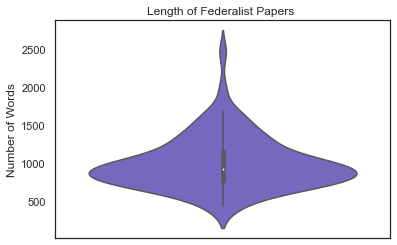

In [5]:
# ----------------------------------------------------------------------------
#                          Viz 2: Document Lengths
# ----------------------------------------------------------------------------

doc_lengths = fed_papers.groupby(['Essay']) \
    .size() \
    .reset_index(name = 'length') \
    .sort_values('length', ascending = False) \
    .reset_index(drop = True)

viz2 = sns.violinplot(y = doc_lengths['length'], 
               color = "Slateblue")

# Set our labels
viz2.set(ylabel = 'Number of Words', title = 'Length of Federalist Papers ')
plt.show()

Most of the essays are somewhere between 500-1000 words, with some being *extremely* length. One essay is almost 2500 words!

How do the lengths of the different essays vary by author? Is one author more verbose than the others? Let's take a look.

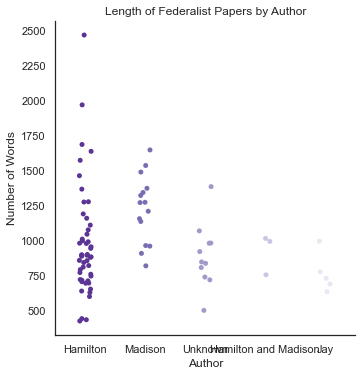

In [7]:
# ----------------------------------------------------------------------------
#                      Viz 3: Document Lengths by Author
# ----------------------------------------------------------------------------
doc_lengths = fed_papers.groupby(['Essay', 'Author']) \
    .size() \
    .reset_index(name = 'length') \
    .sort_values('length', ascending = False) \
    .reset_index(drop = True)

viz3 = sns.catplot(x = 'Author',
                      y = 'length',
                      data = doc_lengths,
                      hue = 'Author',
                      palette = 'Purples_r')
                      # color = "Slateblue")

# Set our labels
viz3.set(xlabel = 'Author', ylabel = 'Number of Words', title = 'Length of Federalist Papers by Author')
plt.show()

A bit hard to tell from this visualization since Hamilton wrote *so* many essays. We can see that the lengthy essay (the 2500 word one) was written by Hamilton.

Our next few visualization constitutes a bar chart of the top 10 words by word count of each author (John Jay, Alexander Hamilton, James Madison, or 
Unknown).

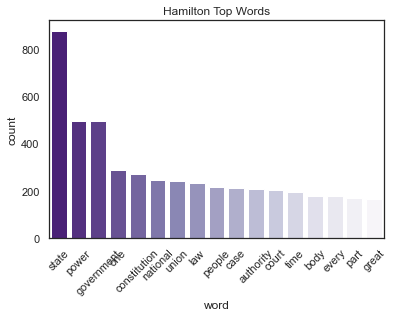

In [8]:
#Hamilton - Visualization 4------------------------------------------------------

doc_lengths = fed_nonstop.groupby(['Author','word']) \
    .Essay.count() \
    .reset_index(name = 'count') \
    .sort_values('count', ascending = False) \
    .reset_index(drop = True)

Hamilton_words = doc_lengths.loc[doc_lengths.Author == 'Hamilton']
Hamilton_top_words = Hamilton_words.head(17)


Hamilton_top_words = Hamilton_top_words.copy()
Hamilton_top_words = Hamilton_top_words[~Hamilton_top_words['word'].isin(stop_words)]

# Set the theme
sns.set_style('white')
sns.set_context('notebook')

# Build the visualization
viz4 = sns.barplot(x = 'word',
            y = 'count',
            data = Hamilton_top_words,
            palette = "Purples_r")

#Rotate X tick labels
viz4.set_xticklabels(viz4.get_xticklabels(), rotation=45 )

# Set our labels
viz4.set(xlabel='word', ylabel='count', title = 'Hamilton Top Words')
plt.show()


Hamilton's ardent support in favor of a strong centralized government is evident here. 5 out of the top 6 words included "power", "one", "government", "national", and "union". 


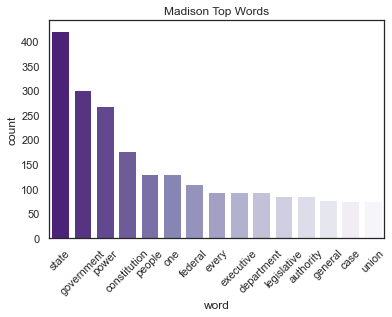

In [9]:
#%% Madison - Visualization 5-------------------------------------------------------

doc_lengths = fed_nonstop.groupby(['Author','word']) \
    .Essay.count() \
    .reset_index(name = 'count') \
    .sort_values('count', ascending = False) \
    .reset_index(drop = True)

Madison_top = doc_lengths.loc[doc_lengths.Author == 'Madison']
Madison_top_words = Madison_top.head(15)

Madison_top_words = Madison_top_words.copy()
Madison_top_words = Madison_top_words[~Madison_top_words['word'].isin(stop_words)]

# Set the theme
sns.set_style('white')
sns.set_context('notebook')

# Build the visualization
viz6 = sns.barplot(x = 'word',
            y = 'count',
            data = Madison_top_words,
            palette = "Purples_r")

#Rotate X tick labels
viz6.set_xticklabels(viz6.get_xticklabels(), rotation=45 )

# Set our labels
viz6.set(xlabel='word', ylabel='count', title = 'Madison Top Words')
plt.show()



Madison's top words shared some similarities with Hamilton's. Both authors had the word "states" and "governments" as their top words of choice. Additionally, out of their 15 top words, they shared 10 words in common, which indicates that the authors were thinking on a similar wavelength. 

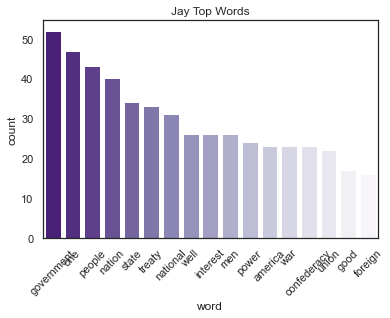

In [10]:

#%% John Jay - Visualization 6--------------------------------------------------

doc_lengths = fed_nonstop.groupby(['Author','word']) \
    .Essay.count() \
    .reset_index(name = 'count') \
    .sort_values('count', ascending = False) \
    .reset_index(drop = True)

Jay_top = doc_lengths.loc[doc_lengths.Author == 'Jay']
Jay_top_words = Jay_top.head(17)


Jay_top_words = Jay_top_words.copy()
Jay_top_words = Jay_top_words[~Jay_top_words['word'].isin(stop_words)]

# Set the theme
sns.set_style('white')
sns.set_context('notebook')

# Build the visualization
viz5 = sns.barplot(x = 'word',
            y = 'count',
            data = Jay_top_words,
            palette = "Purples_r")

#Rotate X tick labels
viz5.set_xticklabels(viz5.get_xticklabels(), rotation=45 )

# Set our labels
viz5.set(xlabel='word', ylabel='count', title = 'Jay Top Words')
plt.show()


In comparison, Jay's top words seem to strike a different tone with his top word being "treaties". There isn't a strong cohesive theme that can be gathered from his top word choice alone. When compared to Hamilton and Madison however, it is clear that he took a different route to convey his support for having a centralized government. 

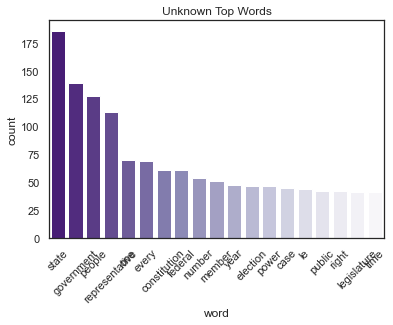

In [11]:
#%% Unknown - Visualization 7-------------------------------------------------------

doc_lengths = fed_nonstop.groupby(['Author','word']) \
    .Essay.count() \
    .reset_index(name = 'count') \
    .sort_values('count', ascending = False) \
    .reset_index(drop = True)

Unknown_top = doc_lengths.loc[doc_lengths.Author == 'Unknown']
Unknown_top_words = Unknown_top.head(19)


Unknown_top_words = Unknown_top_words.copy()
Unknown_top_words = Unknown_top_words[~Unknown_top_words['word'].isin(stop_words)]

# Set the theme
sns.set_style('white')
sns.set_context('notebook')

# Build the visualization
viz7 = sns.barplot(x = 'word',
            y = 'count',
            data = Unknown_top_words,
            palette = "Purples_r")

#Rotate X tick labels
viz7.set_xticklabels(viz7.get_xticklabels(), rotation=45 )

# Set our labels
viz7.set(xlabel='word', ylabel='count', title = 'Unknown Top Words')
plt.show()



Let's dive a bit deeper into word usage throughout The Federalist Papers. We'll make a scatter plot of all the words
that could reasonably appear in our dataset, measuring the number of times each one appears as well as the number of documents it appears in.

The hope here is to take a look at what will eventually be the TF-IDF of each word: that way we can filter out words that appear many times but only in very few documents (like if 'Constitution' were to appear 100 times in total but 95 times in Essay 100.)

Now let's create a grouped dataframe that counts the number of documents a given word appears in (document frequency). This is important to help us identify words that may appear many times but in the same document. A word is considered more "important" if it is not just a frequently occuring word within a document, but a word that appears across many documents.


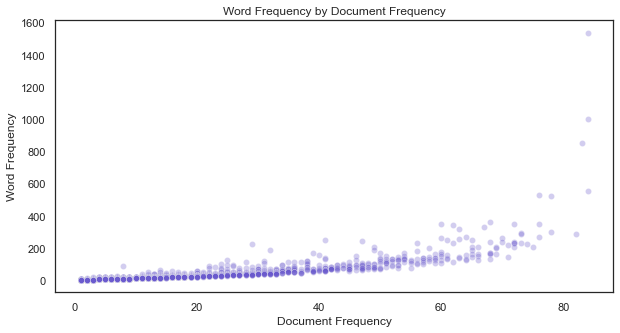

In [12]:
doc_lengths = fed_nonstop[['word', 'Essay']].drop_duplicates() \
    .groupby(['word']) \
    .size() \
    .reset_index(name = 'doc_count') \
    .sort_values('doc_count', ascending = False) \
    .reset_index(drop = True)

merged_counts = pd.merge(word_counts, 
                         doc_lengths, 
                         left_on = 'word', 
                         right_on = 'word',
                         how = 'inner')

# Resize the plot
plt.figure(figsize=(10,5))
viz8 = sns.scatterplot(data = merged_counts, 
                       x = "doc_count", 
                       y = "count",
                       alpha = .3,
                       color = "slateblue")

# Set our labels
viz8.set(ylabel = 'Word Frequency', 
         xlabel = 'Document Frequency',
         title = 'Word Frequency by Document Frequency')

plt.show()



Building on our analysis above, we'll now look into the TF-IDF for each word. Let's start by calculating term frequency. While we've mostly been looking at the word counts across all documents, for term frequency, we care about the proportion of times the word appears in a given document. Ex: If a sentence is 10 words long and 'constitution' appears 3 times, its term frequency is .3 (30%).

In [13]:
fed_analysis = merged_counts.copy()

# Calculate the length of each essay
doc_lengths = fed_nonstop.groupby(['Essay']) \
    .size() \
    .reset_index(name = 'doc_length') \
    .reset_index(drop = True)
    
# Now let's figure out how many times a word appears in a given essay
word_frequency = fed_nonstop.groupby(['word', 'Essay']) \
    .size() \
    .reset_index(name = 'word_freq') \
    .sort_values('word') \
    .reset_index(drop = True)

# With these two dataframes, we can bring them together to calculate our tf score
merged_tf = pd.merge(word_frequency, 
                     doc_lengths, 
                     left_on = 'Essay',
                     right_on = 'Essay',
                     how = 'inner')

merged_tf['tf'] = merged_tf['word_freq'] / merged_tf['doc_length']


# We can pull the inverse document frequency from our merged_counts dataframe above
fed_analysis['idf'] = np.log(85 / fed_analysis['doc_count'])

# Let's merge these (again) into one big dataframe
tf_idf_df = pd.merge(merged_tf,
                     fed_analysis,
                     left_on = 'word',
                     right_on = 'word',
                     how = 'inner')

tf_idf_df['tf_idf'] = tf_idf_df['tf'] * tf_idf_df['idf']


Let's see which words have the highest TF-IDF scores by author. This will help us identify the style of each author by looking at the words that they use most uniquely.

/Users/Owner/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


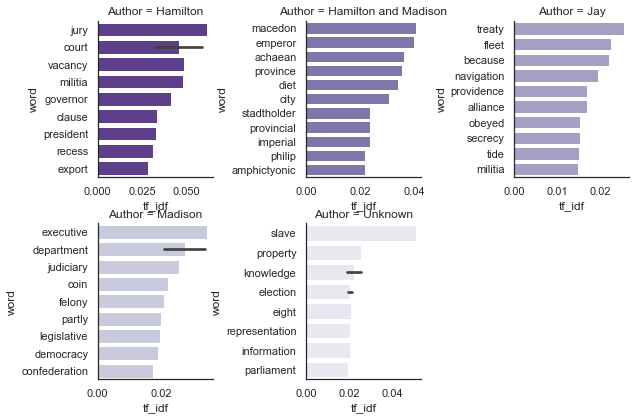

In [22]:
# ----------------------------------------------------------------------------
#                                Viz 9: Top TF-IDF
# ----------------------------------------------------------------------------

authors = fed_nonstop[['Essay', 'Author']].drop_duplicates()

merged_df = tf_idf_df.merge(authors,
                            left_on = 'Essay',
                            right_on = 'Essay')

authors_tf = merged_df.groupby(['tf_idf', 'Author', 'word']) \
    .size() \
    .reset_index(name = 'tfidf') \
    .sort_values('tf_idf', ascending = False) \
    .reset_index(drop = True)
    
# Find our top 10 words for each author
authors_top_tf = authors_tf.groupby('Author')['tf_idf'] \
    .nlargest(10, keep = 'first') \
    .reset_index(name = "tf_idf")

# Unfortunately this drops the actual word, so let's merge it back on
authors_top_tf = authors_top_tf.merge(authors_tf,
                                      left_on = ['Author', 'tf_idf'],
                                      right_on = ['Author', 'tf_idf'])

# Set the theme
sns.set_style('white')
sns.set_context('notebook')

# Build the visualization
viz9 = sns.FacetGrid(authors_top_tf, 
                     col = "Author",
                     hue = 'Author', 
                     col_wrap = 3,
                     palette = 'Purples_r',
                     sharex = False, 
                     sharey = False)
viz9.map(sns.barplot, "tf_idf", "word")

# Set our labels
viz9.set(xlabel='tf_idf', ylabel='word')
plt.show()


These TF-IDF scores give us a heightened sense of some of the most poignant words used by each author. For example, Hamilton seems wholly focused on the Judicial Branch of government (*courts*, *jury*, etc.). Although Madison similarly focused on the judiciary, he also cares quite a bit about the structure of government, referencing words like *faction* and *department(s)*.

## Conclusion  
Thanks for reading! We hope you were able to learn a bit more about the Federalist Papers. If you felt like the article was educational or interesting stay tuned for the next post, where we hope to provide text summarization, an interactive app, and a Tableau infographic. If you have ideas on other routes this could go, please comment your suggestions -- the more ideas, the better!


## Additional Resources    
Interested in seeing the original blog post and our other work? 

1. Justin's blog site: https://www.datacracy.us/
2. Sabri's blog site: https://www.datascienceinnovators.com/

Interested in seeing the original code? Go to the GitHub repository here:  
**https://github.com/jschulberg/Federalist-Papers-NLP**  

Interested in reading the original essays? Go to:  
**https://guides.loc.gov/federalist-papers/text-1-10#s-lg-box-wrapper-25493264**  
